In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/ML_Course/ML_project2/data.csv", names =["id","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses","Class"])
dataset.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
print(dataset['Class'].value_counts())
# Class = 4 is Malignant and class 2 is Benign.

2    458
4    241
Name: Class, dtype: int64


In [ ]:
# Bare Nuclei contains "?", so here "?" is interchanged with average value of the "Bare Nuclei" column.
import math

c = 0
length = len(dataset["Bare Nuclei"])
for x in range(length):
  a = dataset["Bare Nuclei"][x]
  if  a != "?":
    c += int(a)
s1 = str(math.ceil(c/length))
print("Average is: " +s1)
for x in range(length):
  if dataset["Bare Nuclei"][x] == "?":
    dataset["Bare Nuclei"][x] = s1

# here, data type of values of "Bare Nuclei" column is changed to "int".
dataset["Bare Nuclei"] = dataset["Bare Nuclei"].astype(str).astype(int)
# print(dataset.dtypes)

Average is: 4


In [ ]:
dataset.describe()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.555079,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.602496,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataset1 = dataset.drop(['id','Class'], axis=1)
X = dataset1.values

In [ ]:
temp = dataset['Class'].values

Y = []
for val in temp:
    if (val == 2):
        Y.append(-1)
    else:
        Y.append(1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



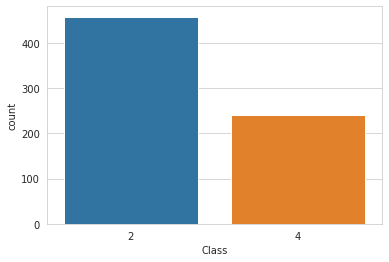

In [ ]:
sns.countplot(dataset['Class'], label = "Count") 
# Class = 4 is Malignant and class 2 is Benign.

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.15, random_state=4)

In [ ]:
import numpy as np
from sklearn.utils import shuffle

z = np.zeros(len(train_x[0]))
epo = 3000
p = 0.1
for a in range(1,epo):
  X1,Y1 =shuffle(train_x, train_y)
  for i,x in enumerate(X1):
    # print(type(X1[5][5])
    if (Y1[i]*np.dot(X1[i], z))>= 1:
      z =z + p *(-2*(1/a)*z)
    else:
      z = z +p*((X1[i]*Y1[i])+(-2*(1/a)*z))

In [ ]:
predictions_list = []
for x in test_x:
  x2 = np.dot(x,z)
  if (x2 > 1):
    predictions_list.append(1)
  else:
    predictions_list.append(-1)

In [ ]:
def accuracy_pred(pred, test):
  prediction_true = 0
  for i in range(len(pred)):
    if pred[i]==test[i]:
      prediction_true += 1
  return (prediction_true/len(pred))*100.0
print(accuracy_pred(predictions_list,test_y))

76.19047619047619


Text(0.5, 15.0, 'Predicted')

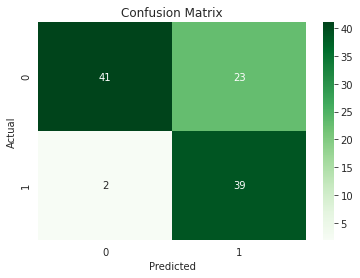

In [ ]:
from sklearn.metrics import confusion_matrix

m =confusion_matrix(test_y,predictions_list)
p = sns.heatmap(pd.DataFrame(m), annot=True, cmap="Greens" ,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
def show_metrics():
    tp = m[1,1]
    fn = m[1,0]
    fp = m[0,1]
    tn = m[0,0]
    print('Precision ={:.3f}'.format(tp/(tp+fp)))
    print('Recall    ={:.3f}'.format(tp/(tp+fn)))
    print('F1_score  ={:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

In [ ]:
show_metrics()

Precision =0.629
Recall    =0.951
F1_score  =0.757


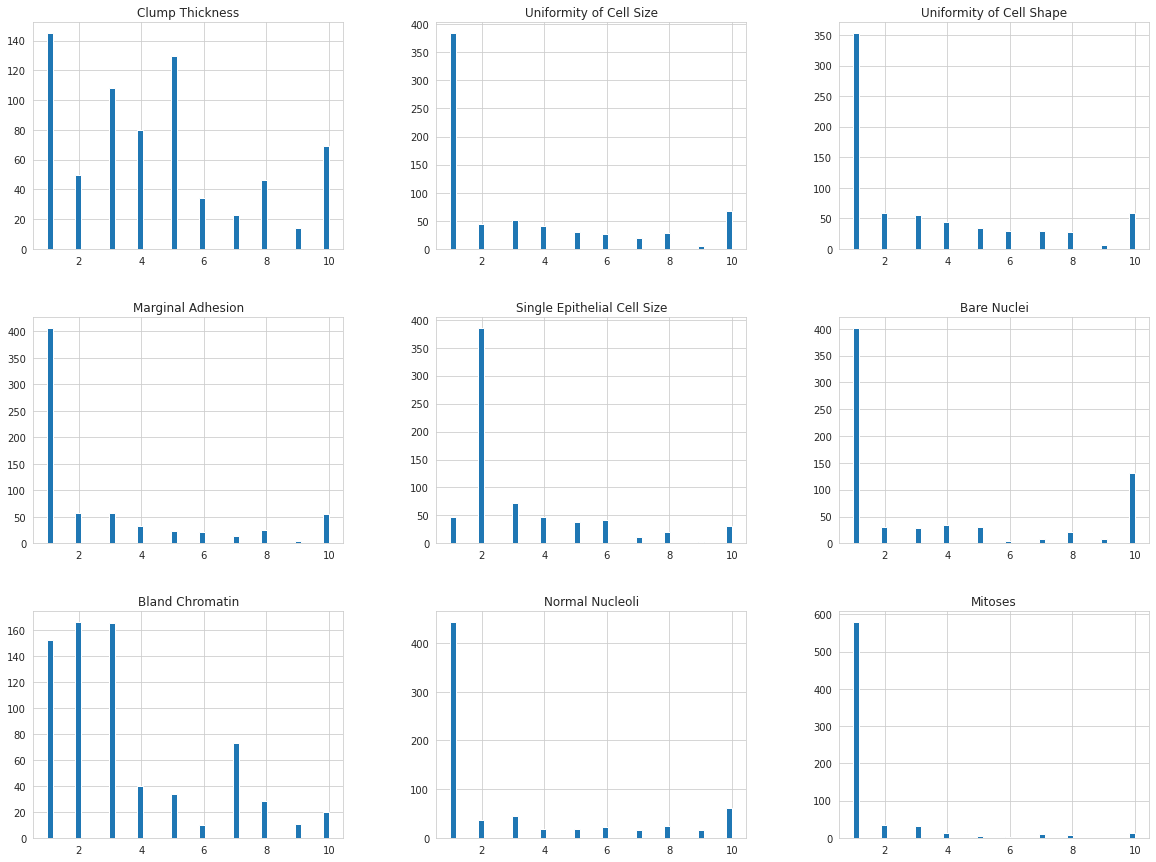

In [ ]:
import matplotlib.pyplot as plt

dataset1.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
dataset2 = dataset.drop(['id'], axis=1)

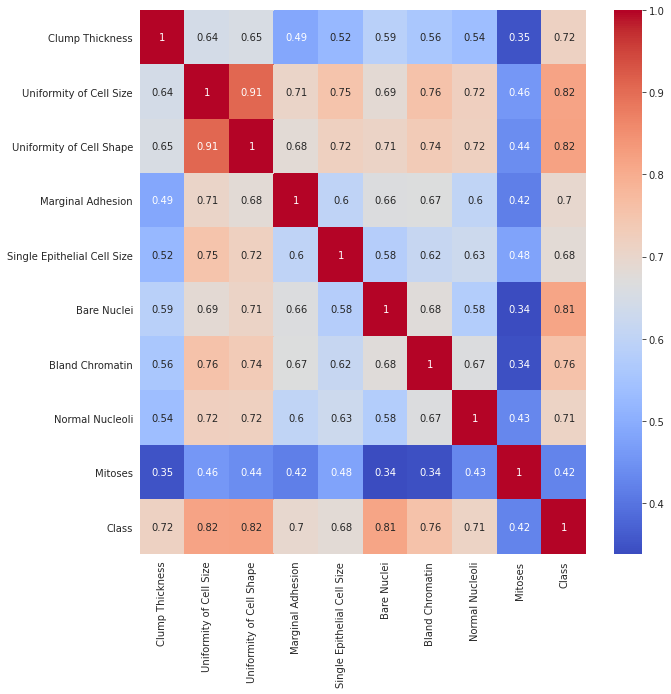

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset2.corr(),annot=True,cmap='coolwarm')

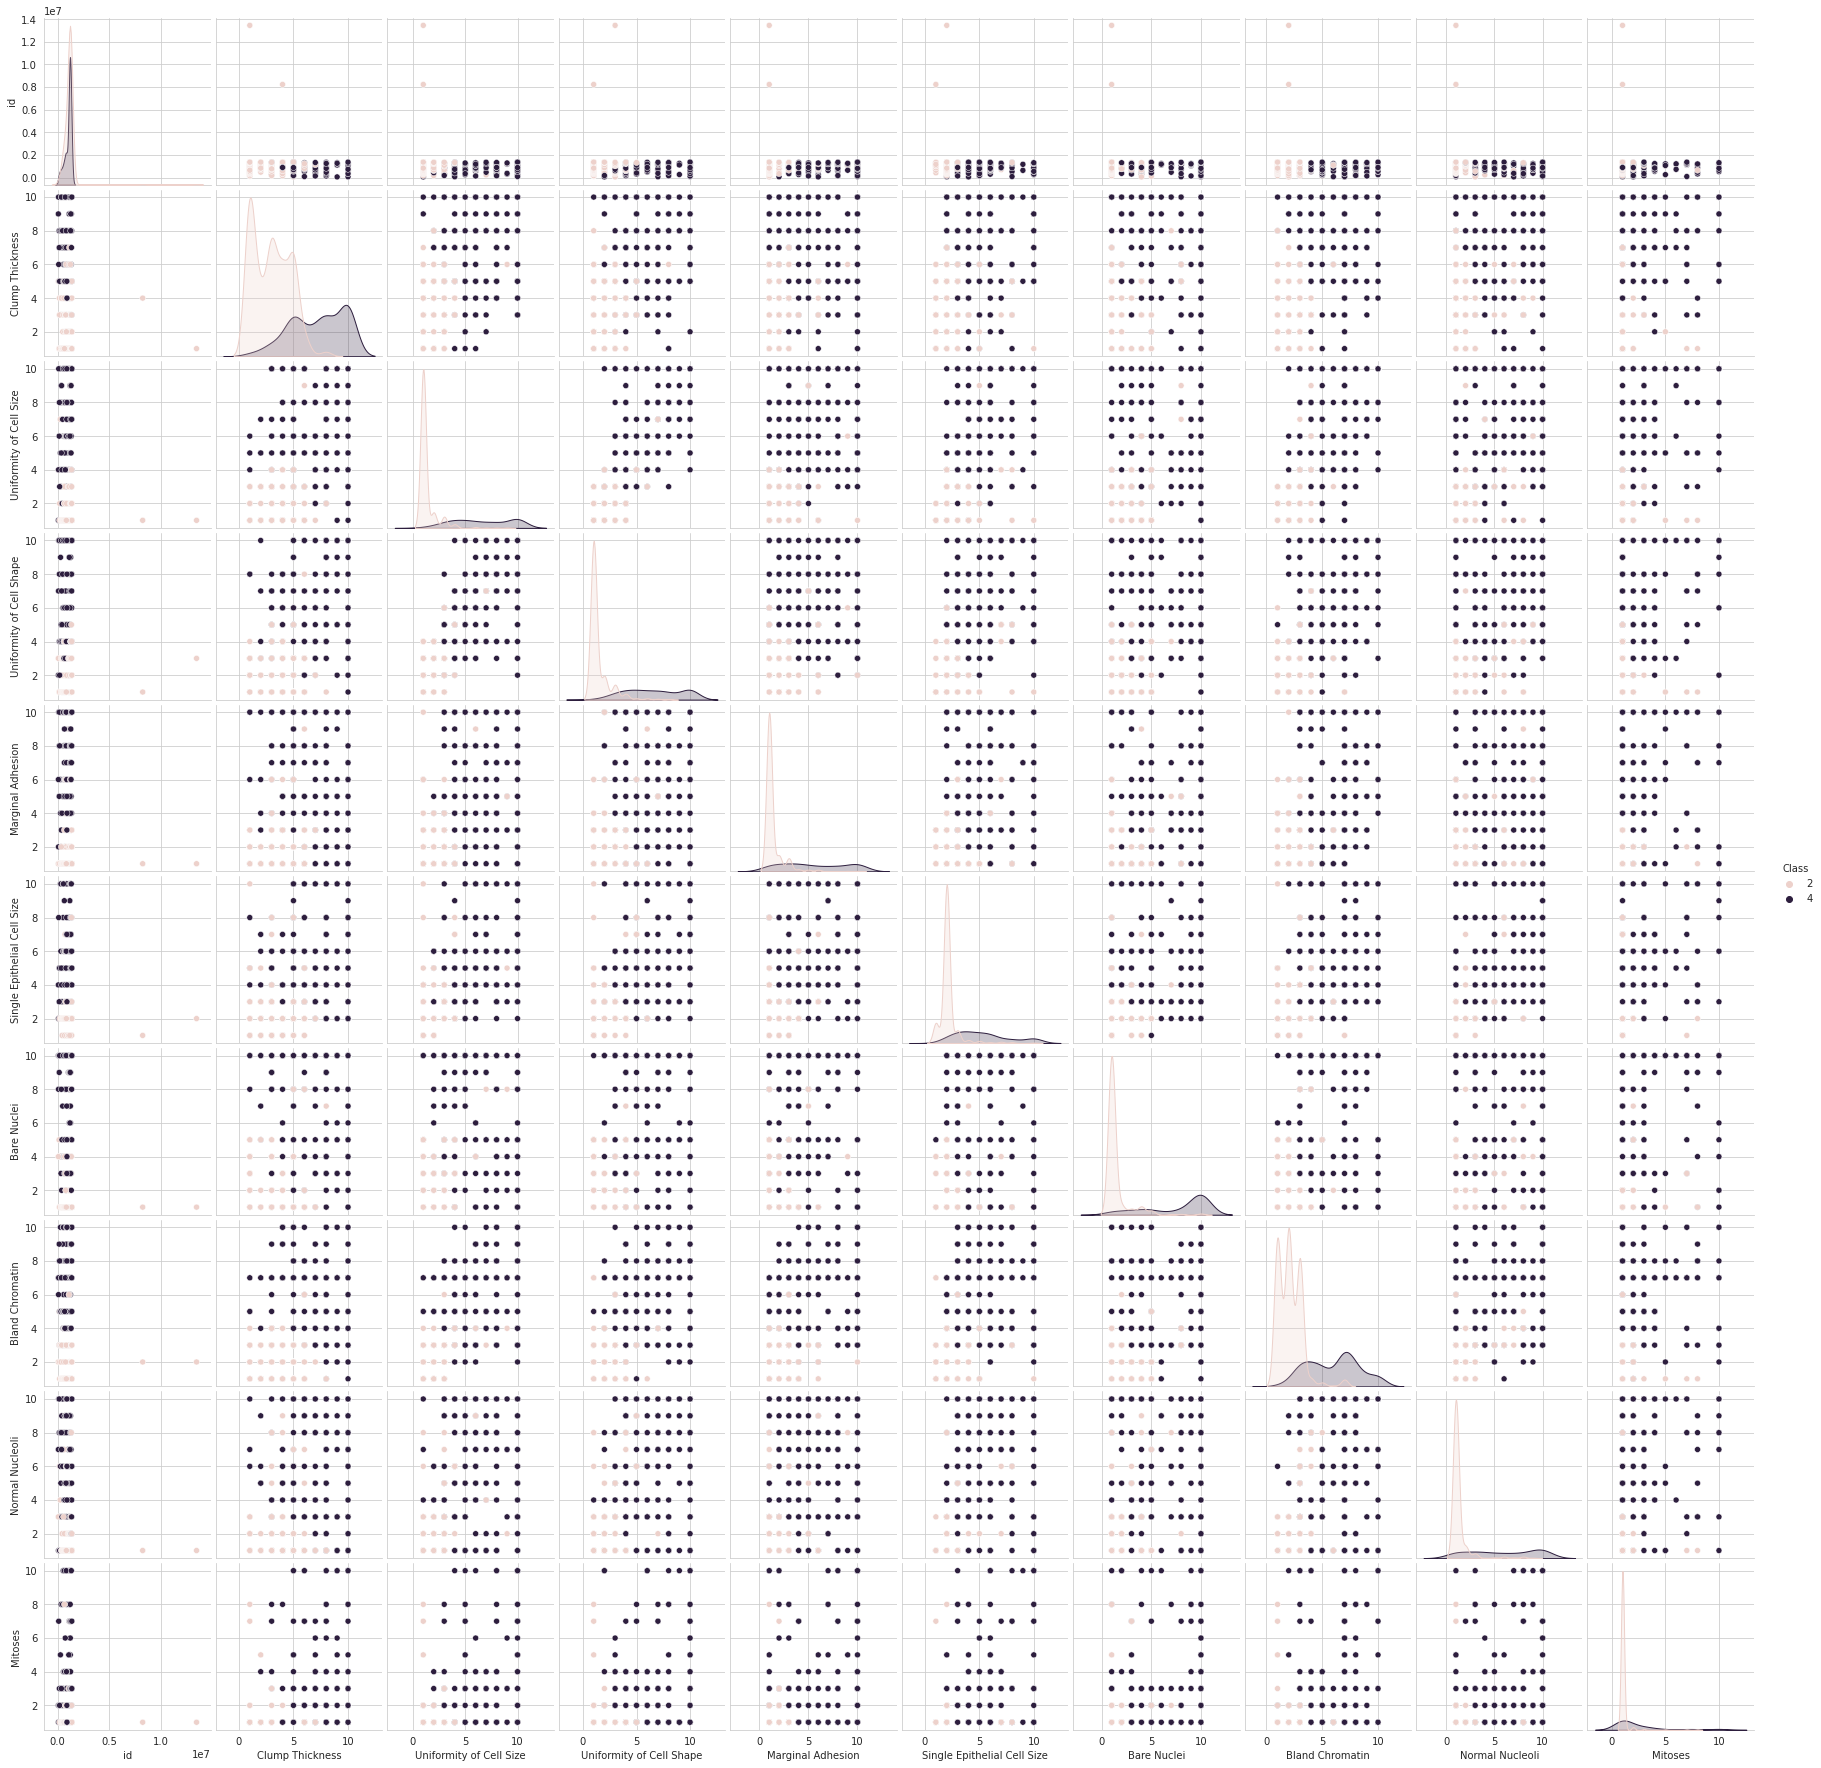

In [ ]:
sns.pairplot(dataset, hue="Class", diag_kind='kde')

In [ ]:
#using library 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

temp = SVC(kernel='linear')
temp.fit(train_x,train_y)
pred2 = temp.predict(test_x)
print(accuracy_score(test_y,pred2))

0.9904761904761905
